## Projeto da disciplina aprendizado supervisionado

### Aluno: Gabriel Angelo Bassetti Machado

#### 1.0 - Importando bibliotecas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

from sklearn import metrics
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

#### 2.0 - Importando e tratando informações para utilização.

In [2]:
url = 'C:/Users/Gabriel-PC/Bootcamp-Data-science/Personal/7 - Aprendizado supervisionado/Projeto Disciplina/winequalityN.csv'

In [3]:
main_df = pd.read_csv(url)

In [4]:
main_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
main_df['type'].unique()

array(['white', 'red'], dtype=object)

In [7]:
# Filtrando a base dados somente para vinhos brancos

df_white = main_df[main_df['type'] == 'white']

In [8]:
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df_white['type'].unique()

array(['white'], dtype=object)

In [10]:
# Criando a variável opinion, no qual será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário.

# Questão número 2 do projeto de disciplina.

df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_936\3625608491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)


In [11]:
# Desconsiderando da análise a variável 'quality'.

# Questão número 2 do projeto de disciplina.

df_white.drop(columns= 'quality', inplace= True)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_936\2621709859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white.drop(columns= 'quality', inplace= True)


In [12]:
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [13]:
df_white['opinion'].unique()

array([1, 0], dtype=int64)

In [14]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  opinion               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


#### Respondendo a questão 3:

Variáveis discretas: ['free sulfur dioxide','total sulfur dioxide','opinion']

Variáveis categóricas: ['type','opinion']

Variáveis contínuas: ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

In [15]:
# Questão 3 - Médias e desvios

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [16]:
# report_df_white = ProfileReport(df_white)
# report_df_white

In [17]:
# filtrando linhas com valores nulos

df_white = df_white.dropna(axis=0)

In [18]:
# filtrando valores duplicados

df_white = df_white.drop_duplicates()

In [19]:
# report_df_white = ProfileReport(df_white)
# report_df_white

Podemos verificar dados sem valores duplicados e nulos.

Porém ainda temos o problema de nossa coluna target desbalanceada.

In [20]:
df_red = main_df[main_df['type'] == 'red']

In [21]:
df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_936\3116034313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)


In [22]:
df_red.drop(columns= 'quality', inplace= True)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_936\1264289549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red.drop(columns= 'quality', inplace= True)


In [23]:
df_red = df_red.dropna(axis=0)

In [24]:
df_red = df_red.drop_duplicates()

#### 3.0 Construindo modelos

3.1 - Preparando os dados para utilização:

- Divisão de treino e teste;
- Padronização;
- Variáveis;
- Funções utilizadas.

In [25]:
X = df_white[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide']]
y = df_white['opinion']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 42, stratify= y) # 30% do dados para teste

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
def avg_kfold_cv(model, X_train, y_train):
    
    scores_acc = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(accuracy_score))

    print("\nCross Validation Scores - Accuracy: ", scores_acc)
    print("Média CV Score - Accuracy: ", scores_acc.mean())

    scores_pre = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(precision_score))

    print("\nCross Validation Scores - Precision: ", scores_pre)
    print("Média CV Score - Precision: ", scores_pre.mean())

    scores_rec = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(recall_score))

    print("\nCross Validation Scores - Recall: ", scores_rec)
    print("Média CV Score - Recall: ", scores_rec.mean())

    scores_f1 = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(f1_score))

    print("\nCross Validation Scores - f1 Score: ", scores_f1)
    print("Média CV Score - f1 Score: ", scores_f1.mean())
    


3.2 Regressão logística

In [29]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [30]:
yhat = lr.predict(X_test)

In [31]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.6897717666948436
Precision Test: 0.7021484375
Recall Test: 0.9206145966709347
f1-score Test: 0.6434656981378631


In [32]:
result_lr = avg_kfold_cv(lr, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.6884058  0.66666667 0.70289855 0.67391304 0.68478261 0.71014493
 0.69565217 0.70289855 0.67391304 0.70909091]
Média CV Score - Accuracy:  0.6908366271409749

Cross Validation Scores - Precision:  [0.70512821 0.69736842 0.71186441 0.69166667 0.69874477 0.71982759
 0.70762712 0.71551724 0.7        0.71610169]
Média CV Score - Precision:  0.7063846110647171

Cross Validation Scores - Recall:  [0.90659341 0.87362637 0.92307692 0.91208791 0.91758242 0.91758242
 0.91758242 0.91208791 0.88461538 0.92857143]
Média CV Score - Recall:  0.9093406593406593

Cross Validation Scores - f1 Score:  [0.79326923 0.77560976 0.80382775 0.78672986 0.79334917 0.80676329
 0.79904306 0.80193237 0.7815534  0.80861244]
Média CV Score - f1 Score:  0.7950690317153459


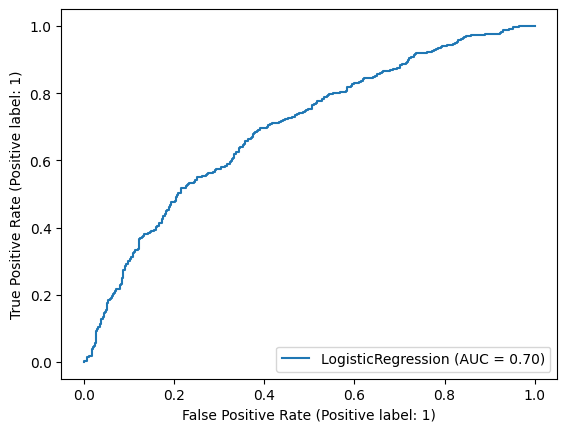

In [33]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

3.3 Árvore de Decisão

In [34]:
dTree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf= 50).fit(X_train,y_train)

# criterion="entropy"

In [35]:
yhat = dTree.predict(X_test)

In [36]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.7117497886728656
Precision Test: 0.7439024390243902
Recall Test: 0.8591549295774648
f1-score Test: 0.696578579739773


In [37]:
result_dTree = avg_kfold_cv(dTree, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.6884058  0.71376812 0.73188406 0.73550725 0.66666667 0.65942029
 0.75362319 0.68478261 0.69565217 0.74545455]
Média CV Score - Accuracy:  0.7075164690382081

Cross Validation Scores - Precision:  [0.73762376 0.75121951 0.75714286 0.77948718 0.7184466  0.71782178
 0.76777251 0.73170732 0.75257732 0.7745098 ]
Média CV Score - Precision:  0.7488308647752071

Cross Validation Scores - Recall:  [0.81868132 0.84615385 0.87362637 0.83516484 0.81318681 0.7967033
 0.89010989 0.82417582 0.8021978  0.86813187]
Média CV Score - Recall:  0.8368131868131867

Cross Validation Scores - f1 Score:  [0.77604167 0.79586563 0.81122449 0.80636605 0.7628866  0.75520833
 0.82442748 0.7751938  0.77659574 0.81865285]
Média CV Score - f1 Score:  0.7902462642341782


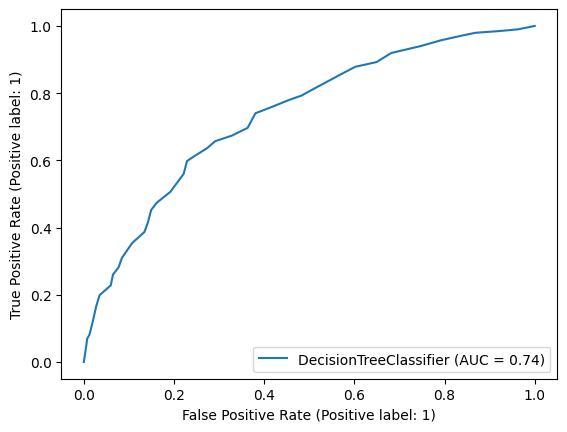

In [38]:
RocCurveDisplay.from_estimator(dTree, X_test, y_test)
plt.show()

3.4 SVM

In [39]:
SVM_met = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [40]:
yhat = SVM_met.predict(X_test)

In [41]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.7269653423499577
Precision Test: 0.75
Recall Test: 0.8796414852752881
f1-score Test: 0.7102772495894665


In [42]:
result_SVM = avg_kfold_cv(SVM_met, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.76086957 0.76811594 0.7826087  0.74275362 0.72101449 0.74637681
 0.75724638 0.74637681 0.72826087 0.76      ]
Média CV Score - Accuracy:  0.7513623188405798

Cross Validation Scores - Precision:  [0.76851852 0.78365385 0.79326923 0.76303318 0.75362319 0.76666667
 0.76995305 0.7745098  0.75598086 0.78431373]
Média CV Score - Precision:  0.7713522068168486

Cross Validation Scores - Recall:  [0.91208791 0.8956044  0.90659341 0.88461538 0.85714286 0.88461538
 0.9010989  0.86813187 0.86813187 0.87912088]
Média CV Score - Recall:  0.8857142857142858

Cross Validation Scores - f1 Score:  [0.83417085 0.83589744 0.84615385 0.81933842 0.80205656 0.82142857
 0.83037975 0.81865285 0.80818414 0.82901554]
Média CV Score - f1 Score:  0.8245277969253323


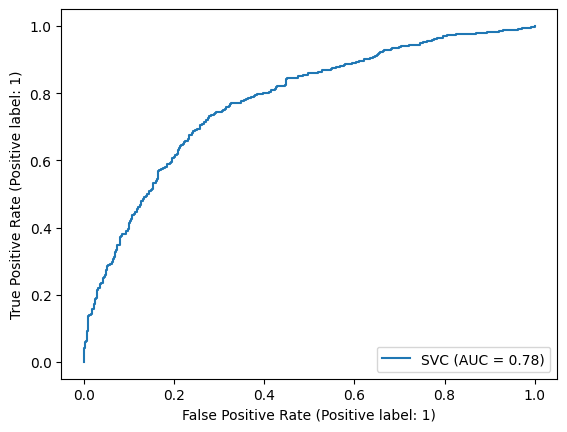

In [43]:
RocCurveDisplay.from_estimator(SVM_met, X_test, y_test)
plt.show()

#### 4.0 Análise do melhor modelo com a utilização da curva ROC (Questão 5)

Usando como parâmetros os valores médio de f1_Score em cada modelo, temos os seguintes dados:

1) Regressão logística - Média CV Score - f1 Score:  0.7950690317153459;

2) Árvore de decisão - Média CV Score - f1 Score:  0.7902462642341782;

3) SVM - Média CV Score - f1 Score:  0.8245277969253323.

Diante dos três valores apresentados, podemos adotar o SVM como modelo que teve a melhor capacidade de classificação dos três nos parâmetros atuais dentro do notebook.


Usando como parâmetro a curva ROC, temos os seguintes:

1) Regressão logística - AUC - 0.70;

2) Árvore de decisão - AUC - 0.74;

3) SVM - AUC:  0.78.

Diante dos três valores apresentados, também podemos adotar o SVM como modelo que teve a melhor capacidade de classificação dos três nos parâmetros atuais dentro do notebook.

#### 5.0 Inferência na base original, utilizando os vinhos tintos. (Questão 6)

5.1 Preparação da base da dados

- Divisão de treino e teste;
- Padronização.

In [44]:
X = df_red[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide']]
y = df_red['opinion']

In [45]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

5.2 Inferência

In [46]:
yhat = SVM_met.predict(X)

In [47]:
print("Accuracy Test:",metrics.accuracy_score(y, yhat))
print("Precision Test:",metrics.precision_score(y,yhat))
print("Recall Test:",metrics.recall_score(y,yhat))
print("f1-score Test:",metrics.f1_score(y,yhat, average='weighted'))

Accuracy Test: 0.6082779009608278
Precision Test: 0.5835591689250226
Recall Test: 0.9034965034965035
f1-score Test: 0.5635646399229389


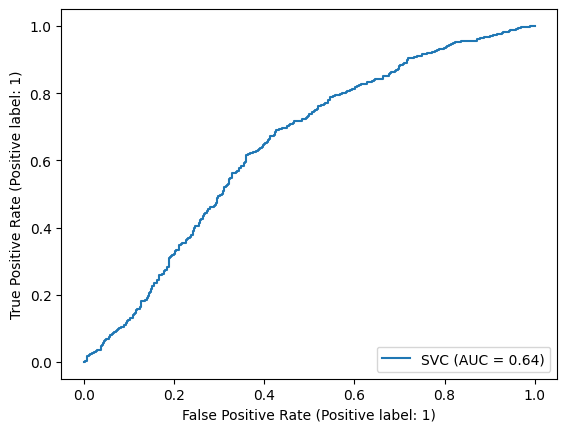

In [48]:
RocCurveDisplay.from_estimator(SVM_met, X, y)
plt.show()

Aplicando o modelo de SVM treinado nos vinhos brancos para a base de dados dos vinhos tintos, ele não consegue a mesma eficácia de classificação.

Apresentou a piora no f1-score e também no AUC da curva ROC.